In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('customer_intelligence_dataset.csv')
df.head()

,sale_id,customer_id,product_id,product_name,category,price,quantity,sale_date,total_value,age,gender,region,segment,churn,tenure_months,last_purchase_date,feedback_text,sentiment
0,S000001,CUST01553,P004,Desk,Furniture,12000,2,2020-01-07,24000,40,Female,West,Small Business,1,37,2023-04-04,"Terrible experience, will not buy again.",Negative
1,S000002,CUST00161,P010,Projector,Electronics,45000,2,2023-11-10,90000,50,Female,West,Corporate,0,44,2023-03-02,Excellent customer service.,Positive
2,S000003,CUST00627,P010,Projector,Electronics,45000,4,2022-07-04,180000,33,Male,South,Corporate,0,25,2023-11-04,Product quality could be better.,Neutral
3,S000004,CUST01291,P009,Monitor,Electronics,12000,1,2023-10-18,12000,41,Male,West,Consumer,0,56,2023-08-18,"Delivery was late, not happy.",Positive
4,S000005,CUST01456,P004,Desk,Furniture,12000,4,2023-09-13,48000,60,Female,West,Consumer,0,52,2023-05-14,"Delivery was late, not happy.",Positive


In [70]:
df["sale_date"] = pd.to_datetime(df["sale_date"], errors="coerce")
df["last_purchase_date"] = pd.to_datetime(df["last_purchase_date"], errors="coerce")

In [71]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Shape: (8000, 18)

Missing values:
 sale_id               0
customer_id           0
product_id            0
product_name          0
category              0
price                 0
quantity              0
sale_date             0
total_value           0
age                   0
gender                0
region                0
segment               0
churn                 0
tenure_months         0
last_purchase_date    0
feedback_text         0
sentiment             0
dtype: int64

Duplicates: 0


In [72]:
print("\nData Types:\n", df.dtypes)


Data Types:
 sale_id                       object
customer_id                   object
product_id                    object
product_name                  object
category                      object
price                          int64
quantity                       int64
sale_date             datetime64[ns]
total_value                    int64
age                            int64
gender                        object
region                        object
segment                       object
churn                          int64
tenure_months                  int64
last_purchase_date    datetime64[ns]
feedback_text                 object
sentiment                     object
dtype: object


In [73]:
print(df.describe())

              price     quantity            sale_date    total_value  \
count   8000.000000  8000.000000                 8000    8000.000000   
mean   19091.193750     2.997000  2021-12-21 08:12:18   57801.706250   
min       50.000000     1.000000  2020-01-01 00:00:00      50.000000   
25%     3000.000000     2.000000  2020-12-18 00:00:00    8000.000000   
50%    12000.000000     3.000000  2021-12-16 00:00:00   30000.000000   
75%    25000.000000     4.000000  2022-12-20 00:00:00   70000.000000   
max    70000.000000     5.000000  2023-12-31 00:00:00  350000.000000   
std    21398.129086     1.414122                  NaN   77182.675351   

               age        churn  tenure_months          last_purchase_date  
count  8000.000000  8000.000000    8000.000000                        8000  
mean     41.483875     0.248125      29.721125  2023-07-01 02:03:39.600000  
min      18.000000     0.000000       1.000000         2023-01-01 00:00:00  
25%      30.000000     0.000000      14.000

In [74]:
print("\nUnique counts:\n", df.nunique())


Unique counts:
 sale_id               8000
customer_id           1967
product_id              10
product_name            10
category                 3
price                    9
quantity                 5
sale_date             1456
total_value             37
age                     47
gender                   2
region                   4
segment                  3
churn                    2
tenure_months           59
last_purchase_date     365
feedback_text           10
sentiment                3
dtype: int64


In [75]:
print("\nChurn distribution:\n", df['churn'].value_counts())
print("\nSentiment distribution:\n", df['sentiment'].value_counts())


Churn distribution:
 churn
0    6015
1    1985
Name: count, dtype: int64

Sentiment distribution:
 sentiment
Positive    3926
Neutral     2444
Negative    1630
Name: count, dtype: int64


/var/folders/y2/5cx4xthx2k16l8p9r2r9t1j80000gn/T/ipykernel_23504/1191517770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="churn_label", data=df, palette="pastel")


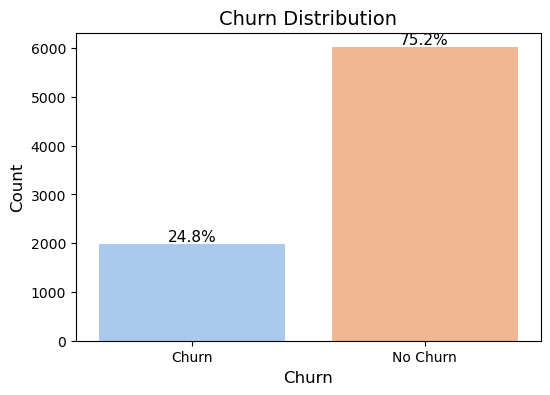

In [76]:
# Map churn values to labels
df["churn_label"] = df["churn"].map({0: "No Churn", 1: "Churn"})

plt.figure(figsize=(6,4))
ax = sns.countplot(x="churn_label", data=df, palette="pastel")

# Add percentages on top of bars
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count/total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom',
                fontsize=11)

plt.title("Churn Distribution", fontsize=14)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


/var/folders/y2/5cx4xthx2k16l8p9r2r9t1j80000gn/T/ipykernel_23504/3349801214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


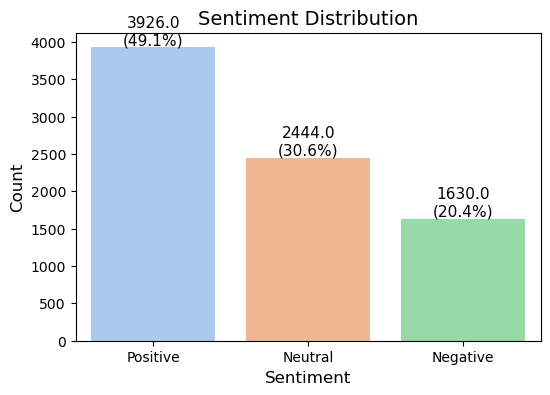

In [77]:
plt.figure(figsize=(6,4))
ax = sns.countplot(
    x="sentiment",
    data=df,
    order=["Positive", "Neutral", "Negative"],
    palette="pastel"
)

# Add counts and percentages
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f"{100 * count/total:.1f}%"
    ax.annotate(f"{count}\n({percentage})",
                (p.get_x() + p.get_width() / 2., count),
                ha="center", va="bottom",
                fontsize=11)

plt.title("Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


/var/folders/y2/5cx4xthx2k16l8p9r2r9t1j80000gn/T/ipykernel_23504/517477837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


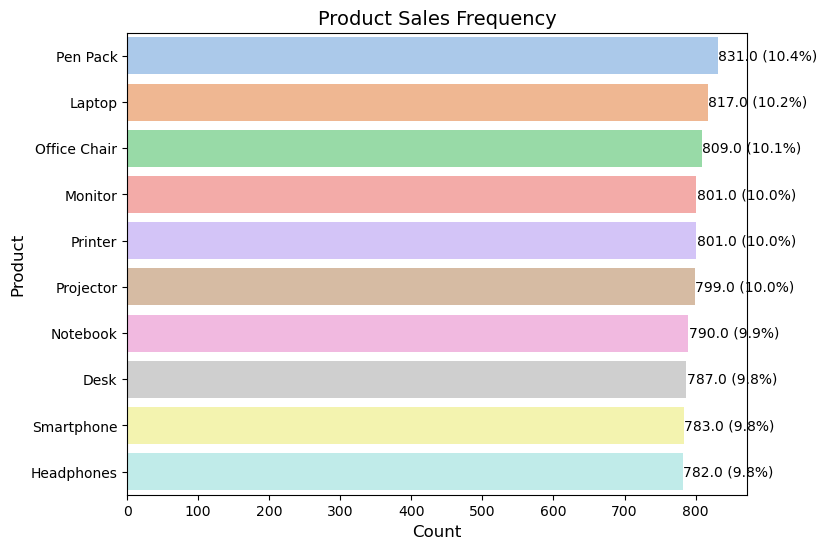

In [78]:
plt.figure(figsize=(8,6))
ax = sns.countplot(
    y="product_name",
    data=df,
    order=df["product_name"].value_counts().index,
    palette="pastel"
)

# Add counts and percentages on bars
total = len(df)
for p in ax.patches:
    count = p.get_width()
    percentage = f"{100 * count/total:.1f}%"
    ax.annotate(f"{count} ({percentage})",
                (count + 0.5, p.get_y() + p.get_height() / 2.),
                ha="left", va="center", fontsize=10)

plt.title("Product Sales Frequency", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.show()


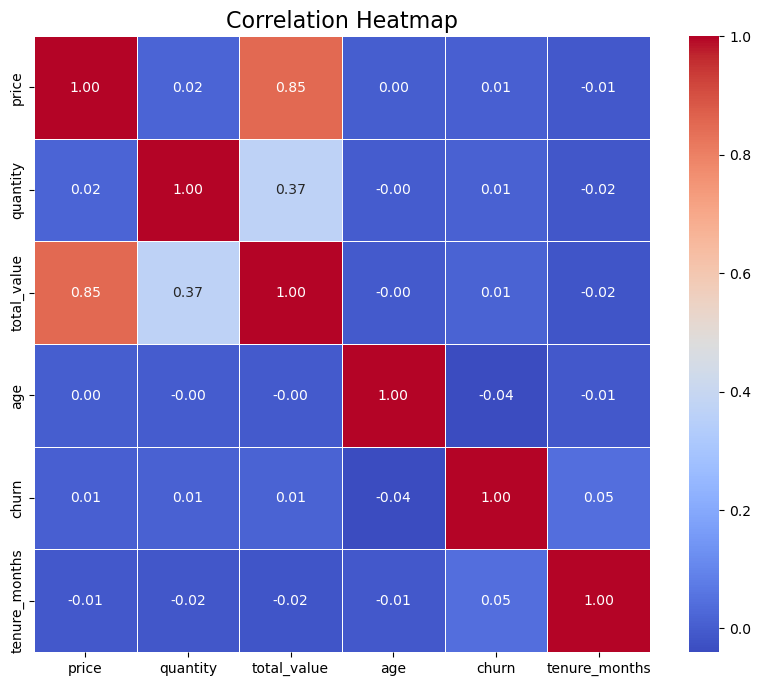

In [79]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)   # get numeric correlations
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar=True,
    square=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


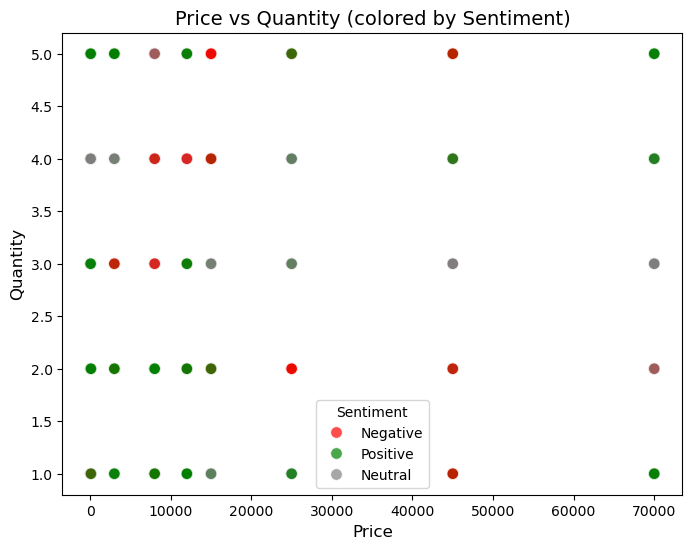

In [80]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="price", y="quantity",
    hue="sentiment",
    data=df,
    palette={"Positive": "green", "Neutral": "gray", "Negative": "red"},
    alpha=0.7,
    s=70
)
plt.title("Price vs Quantity (colored by Sentiment)", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.legend(title="Sentiment")
plt.show()


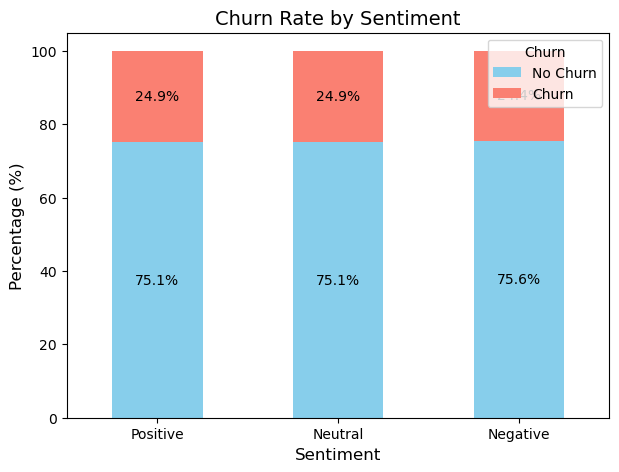

In [81]:
ct = pd.crosstab(df["sentiment"], df["churn"], normalize="index") * 100
ct = ct.loc[["Positive","Neutral","Negative"]]   # keep your order

# Plot
ax = ct.plot(
    kind="bar",
    stacked=True,
    color=["skyblue", "salmon"],
    figsize=(7,5)
)

plt.title("Churn Rate by Sentiment", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(title="Churn", labels=["No Churn", "Churn"])
plt.xticks(rotation=0)

# Add labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="black")

plt.show()

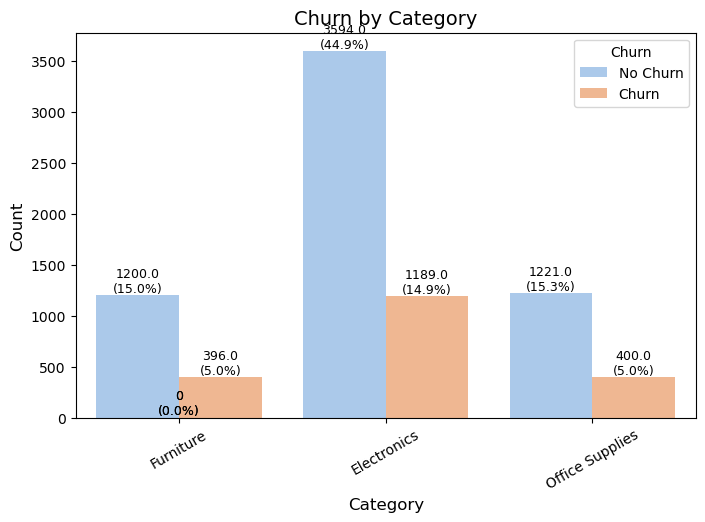

In [82]:
plt.figure(figsize=(8,5))
ax = sns.countplot(
    x="category", 
    hue="churn", 
    data=df, 
    palette="pastel"
)

# Add count labels on bars
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f"{100*count/total:.1f}%"
    ax.annotate(f"{count}\n({percentage})",
                (p.get_x() + p.get_width()/2., count),
                ha="center", va="bottom", fontsize=9)

plt.title("Churn by Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=30)
plt.legend(title="Churn", labels=["No Churn","Churn"])
plt.show()


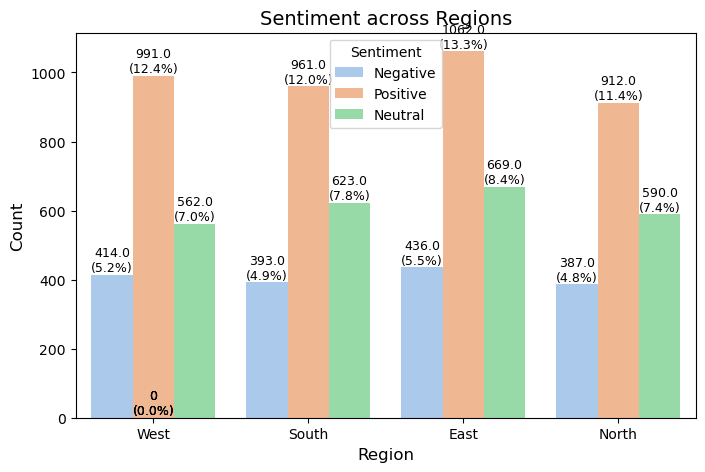

In [83]:
plt.figure(figsize=(8,5))
ax = sns.countplot(
    x="region",
    hue="sentiment",
    data=df,
    palette="pastel"
)

# Add counts and percentages above bars
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f"{100*count/total:.1f}%"
    ax.annotate(f"{count}\n({percentage})",
                (p.get_x() + p.get_width()/2., count),
                ha="center", va="bottom", fontsize=9)

plt.title("Sentiment across Regions", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Sentiment")
plt.show()


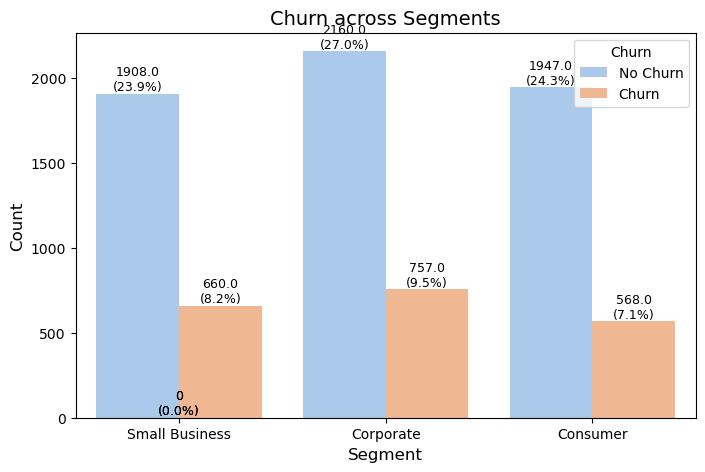

In [84]:
plt.figure(figsize=(8,5))
ax = sns.countplot(
    x="segment",
    hue="churn",
    data=df,
    palette="pastel"
)

# Add counts + % of total above bars
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f"{100*count/total:.1f}%"
    ax.annotate(f"{count}\n({percentage})",
                (p.get_x() + p.get_width()/2., count),
                ha="center", va="bottom", fontsize=9)

plt.title("Churn across Segments", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Churn", labels=["No Churn","Churn"])
plt.show()


/var/folders/y2/5cx4xthx2k16l8p9r2r9t1j80000gn/T/ipykernel_23504/1028037789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


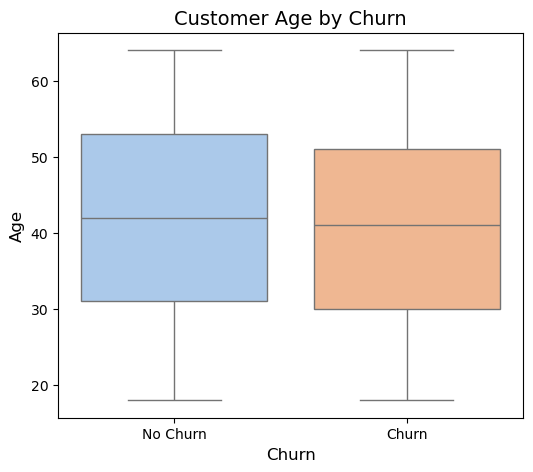

In [85]:
plt.figure(figsize=(6,5))
sns.boxplot(
    x="churn",
    y="age",
    data=df,
    palette="pastel"
)

plt.title("Customer Age by Churn", fontsize=14)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.xticks([0,1], ["No Churn","Churn"])  # relabel 0/1
plt.show()


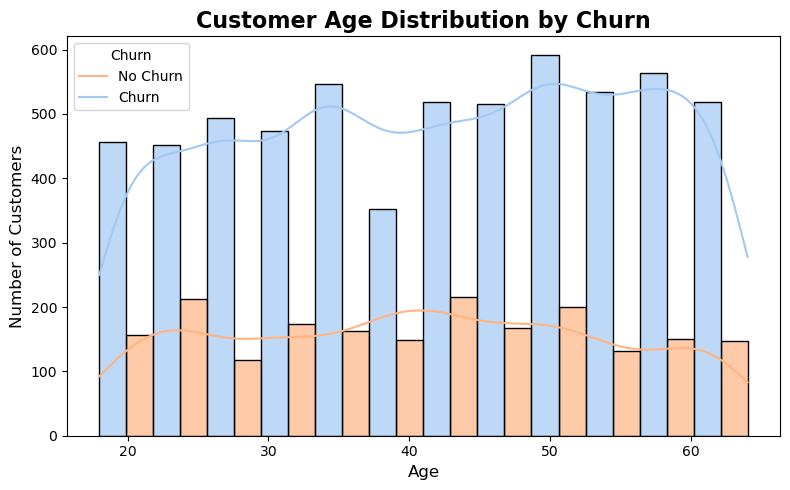

In [86]:
plt.figure(figsize=(8,5))
ax = sns.histplot(
    data=df,
    x="age",
    hue="churn",
    bins=12,                     # slightly more bins for smoother detail
    kde=True,                    # overlay smooth curve
    palette="pastel",
    edgecolor="black",
    multiple="dodge",            # side-by-side for easier comparison
    alpha=0.7                    # slight transparency
)

plt.title("Customer Age Distribution by Churn", fontsize=16, weight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Churn", labels=["No Churn","Churn"])
plt.tight_layout()
plt.show()


/var/folders/y2/5cx4xthx2k16l8p9r2r9t1j80000gn/T/ipykernel_23504/2842972902.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_over_time = df.set_index("sale_date").resample("M")["total_value"].sum().reset_index()


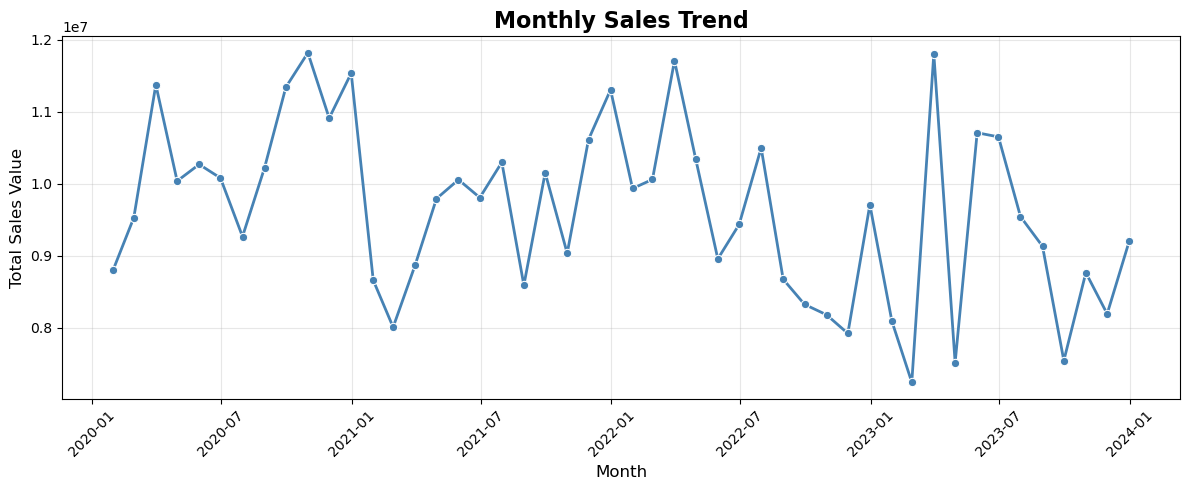

In [87]:
# Ensure datetime
df["sale_date"] = pd.to_datetime(df["sale_date"])

# Resample to monthly sales
sales_over_time = df.set_index("sale_date").resample("M")["total_value"].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(
    x="sale_date", y="total_value",
    data=sales_over_time,
    marker="o", linewidth=2, color="steelblue"
)

plt.title("Monthly Sales Trend", fontsize=16, weight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales Value", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


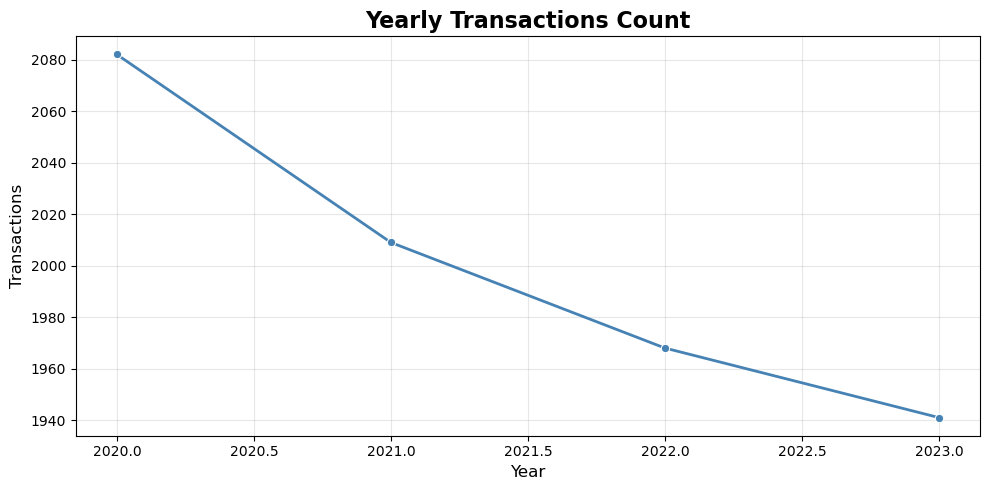

In [88]:
# Make sure sale_date is datetime
df["sale_date"] = pd.to_datetime(df["sale_date"])

# Extract year
df["year"] = df["sale_date"].dt.year

# Group by year
yearly_sales = df.groupby("year")["product_id"].count().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(
    x="year", y="product_id",
    data=yearly_sales, marker="o", linewidth=2, color="steelblue"
)

plt.title("Yearly Transactions Count", fontsize=16, weight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Transactions", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


/var/folders/y2/5cx4xthx2k16l8p9r2r9t1j80000gn/T/ipykernel_23504/2464136523.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


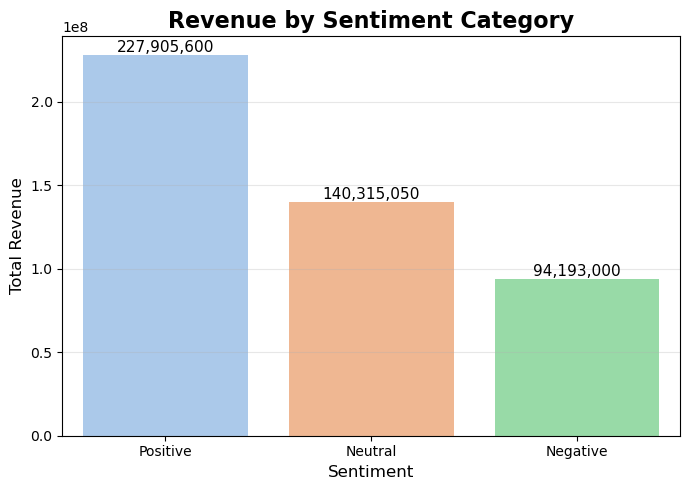

In [89]:
# Aggregate total revenue by sentiment
sentiment_revenue = df.groupby("sentiment")["total_value"].sum().reset_index()

# Plot
plt.figure(figsize=(7,5))
ax = sns.barplot(
    x="sentiment", y="total_value",
    data=sentiment_revenue,
    order=["Positive","Neutral","Negative"],
    palette="pastel"
)

# Add value labels
for p in ax.patches:
    value = int(p.get_height())
    ax.annotate(f"{value:,.0f}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha="center", va="bottom", fontsize=11)

plt.title("Revenue by Sentiment Category", fontsize=16, weight="bold")
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [90]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


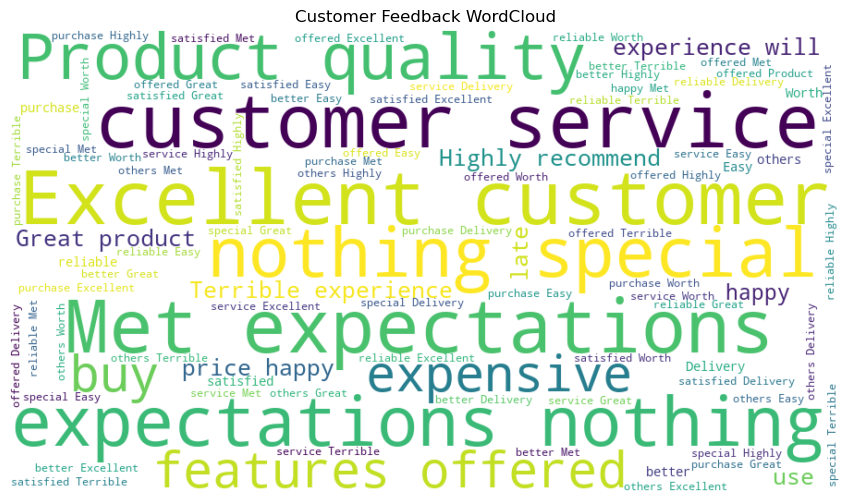

In [91]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(df["feedback_text"].astype(str))

wc = WordCloud(width=900, height=500, background_color="white",
               stopwords=set(STOPWORDS), colormap="viridis").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Customer Feedback WordCloud")
plt.show()

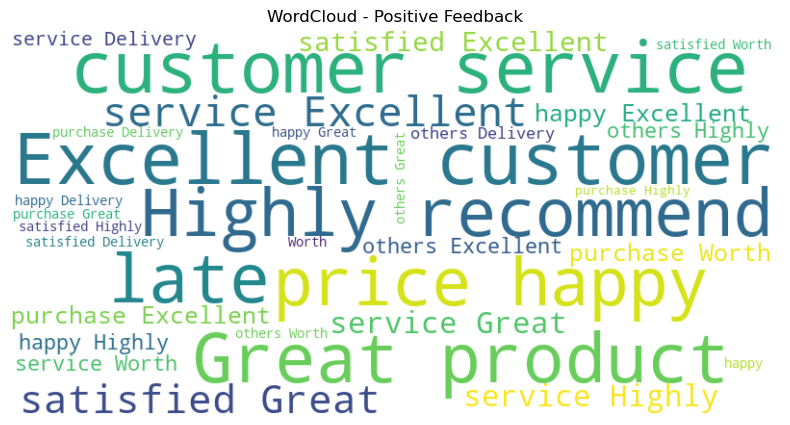

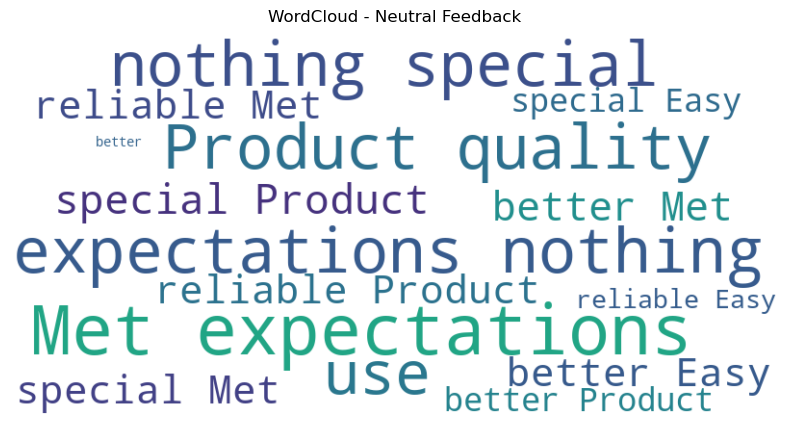

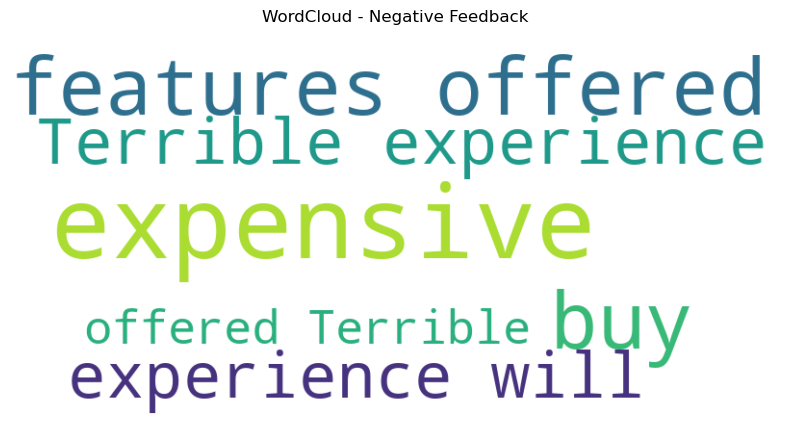

In [92]:
for sentiment in ["Positive", "Neutral", "Negative"]:
    text = " ".join(df[df["sentiment"]==sentiment]["feedback_text"].astype(str))
    wc = WordCloud(width=800, height=400, background_color="white",
                   stopwords=set(STOPWORDS)).generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud - {sentiment} Feedback")
    plt.show()

Top Bigrams: [('excellent customer', 853), ('met expectations', 834), ('expectations special', 834), ('quality better', 826), ('expensive features', 816), ('features offered', 816), ('terrible experience', 814), ('experience buy', 814), ('great product', 790), ('easy use', 784)]
Top Trigrams: [('excellent customer service', 853), ('met expectations special', 834), ('expensive features offered', 816), ('terrible experience buy', 814), ('great product satisfied', 790), ('easy use reliable', 784), ('delivery late happy', 765), ('worth price happy', 758), ('price happy purchase', 758)]


/var/folders/y2/5cx4xthx2k16l8p9r2r9t1j80000gn/T/ipykernel_23504/2626079865.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


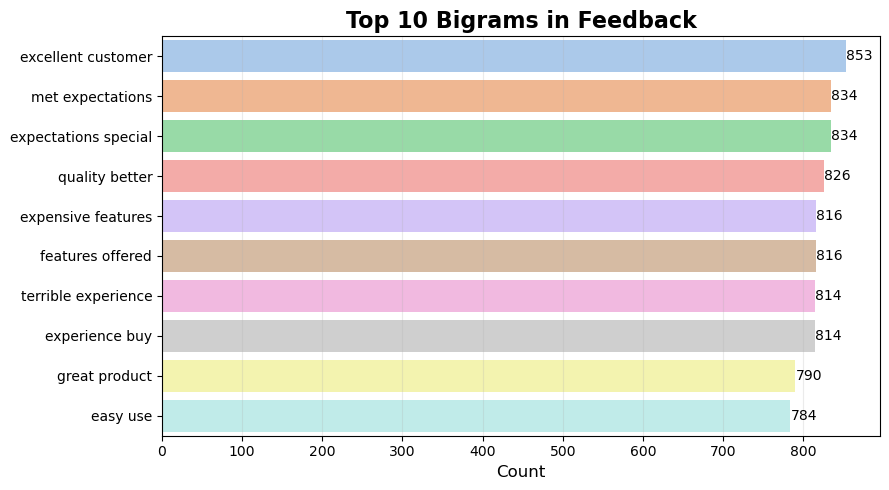

/var/folders/y2/5cx4xthx2k16l8p9r2r9t1j80000gn/T/ipykernel_23504/2626079865.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


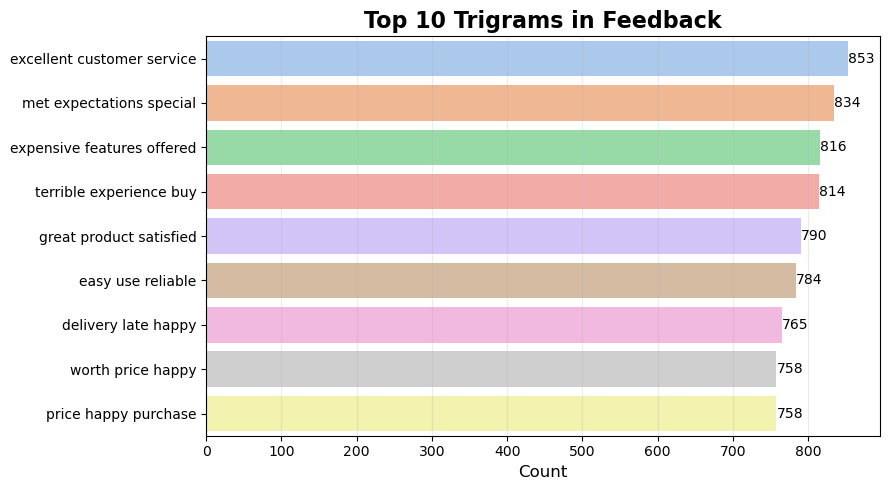

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from textwrap import fill

# --- Config ---
CUSTOM_STOPWORDS = {"product","service","customer","buy","purchase"}  # tweak as you like
PALETTE = "pastel"

def get_top_ngrams(corpus, ngram_range=(2,2), top_n=10, min_df=2, max_features=None):
    """
    Returns list of (ngram, count) sorted desc.
    """
    corpus = pd.Series(corpus).fillna("").astype(str)

    vec = CountVectorizer(
        ngram_range=ngram_range,
        stop_words="english",
        lowercase=True,
        strip_accents="unicode",
        token_pattern=r"(?u)\b[a-zA-Z]{2,}\b",  # keep words >=2 letters
        min_df=min_df,
        max_features=max_features
    )
    X = vec.fit_transform(corpus)
    # Drop custom domain words if they slipped through stop_words
    vocab = {w:i for w,i in vec.vocabulary_.items() if w.split()[0] not in CUSTOM_STOPWORDS}

    if not vocab:
        return []

    counts = X.sum(axis=0).A1
    items = [(w, counts[i]) for w,i in vocab.items()]
    items.sort(key=lambda x: x[1], reverse=True)
    return items[:top_n]

def plot_ngrams(pairs, title, xlabel="Count"):
    if not pairs:
        print(f"No n-grams to show for: {title}")
        return
    dfp = pd.DataFrame(pairs, columns=["ngram","count"])
    # Wrap long labels for readability
    dfp["ngram_wrapped"] = dfp["ngram"].apply(lambda s: fill(s, width=30))
    plt.figure(figsize=(9,5))
    ax = sns.barplot(
        y="ngram_wrapped", x="count",
        data=dfp, palette=PALETTE, orient="h"
    )
    # Add labels
    for p in ax.patches:
        x = p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(f"{int(x)}", (x + 0.3, y), va="center", ha="left", fontsize=10)
    plt.title(title, fontsize=16, weight="bold")
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("")
    plt.grid(axis="x", alpha=0.25)
    plt.tight_layout()
    plt.show()

# ----- Run it -----
# Top bigrams & trigrams
top_bigrams  = get_top_ngrams(df["feedback_text"], (2,2), top_n=10, min_df=2)
top_trigrams = get_top_ngrams(df["feedback_text"], (3,3), top_n=10, min_df=2)

print("Top Bigrams:", top_bigrams)
print("Top Trigrams:", top_trigrams)

plot_ngrams(top_bigrams,  "Top 10 Bigrams in Feedback")
plot_ngrams(top_trigrams, "Top 10 Trigrams in Feedback")


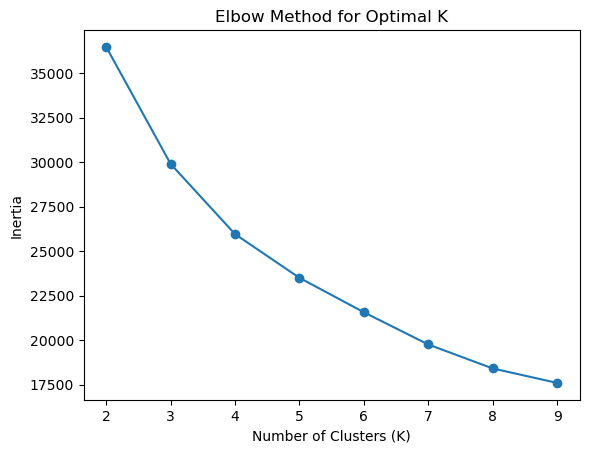

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select numerical features for clustering
features = ["price", "quantity", "total_value", "age", "churn", "tenure_months"]

X = df[features]

# Scale features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run K-Means with elbow method to choose clusters
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Apply K-Means with chosen K (let’s assume 3 for demo, adjust after elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

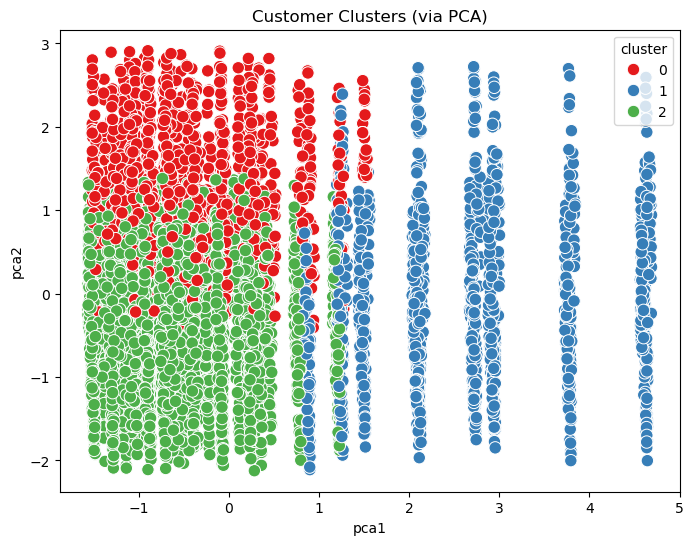

In [95]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["pca1"] = pca_result[:,0]
df["pca2"] = pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=df, palette="Set1", s=80)
plt.title("Customer Clusters (via PCA)")
plt.show()

In [96]:
cluster_profile = df.groupby("cluster")[features].mean()
print("Cluster Profiles:\n", cluster_profile)

# Churn rate per cluster
churn_cluster = df.groupby("cluster")["churn"].mean()
print("\nChurn Rate by Cluster:\n", churn_cluster)

# Sentiment distribution per cluster
sentiment_cluster = df.groupby("cluster")["sentiment"].value_counts(normalize=True).unstack().fillna(0)
print("\nSentiment Distribution by Cluster:\n", sentiment_cluster)

Cluster Profiles:
                 price  quantity    total_value        age     churn  \
cluster                                                               
0        11223.513514  2.941742   31197.147147  40.548949  1.000000   
1        59694.244604  3.307194  194003.597122  41.690647  0.230216   
2        10327.077856  2.928413   28474.297270  41.740546  0.000000   

         tenure_months  
cluster                 
0            31.440240  
1            28.823741  
2            29.394540  

Churn Rate by Cluster:
 cluster
0    1.000000
1    0.230216
2    0.000000
Name: churn, dtype: float64

Sentiment Distribution by Cluster:
 sentiment  Negative   Neutral  Positive
cluster                                
0          0.203003  0.298498  0.498498
1          0.206475  0.307914  0.485612
2          0.203236  0.307179  0.489585


#Linear Regression

✅ Accuracy: 0.751875

Confusion Matrix:
 [[1203    0]
 [ 397    0]]

Classification Report:
               precision    recall  f1-score   support

           0      0.752     1.000     0.858      1203
           1      0.000     0.000     0.000       397

    accuracy                          0.752      1600
   macro avg      0.376     0.500     0.429      1600
weighted avg      0.565     0.752     0.645      1600

ROC-AUC Score: 0.5335255480107457


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


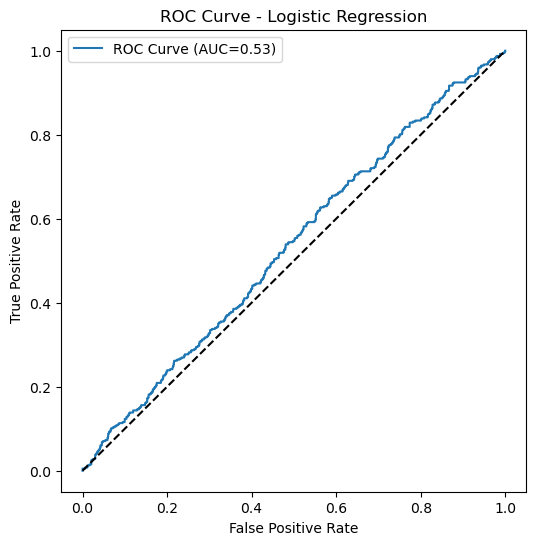

/var/folders/y2/5cx4xthx2k16l8p9r2r9t1j80000gn/T/ipykernel_23504/1699682265.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coeff_df, palette="coolwarm")


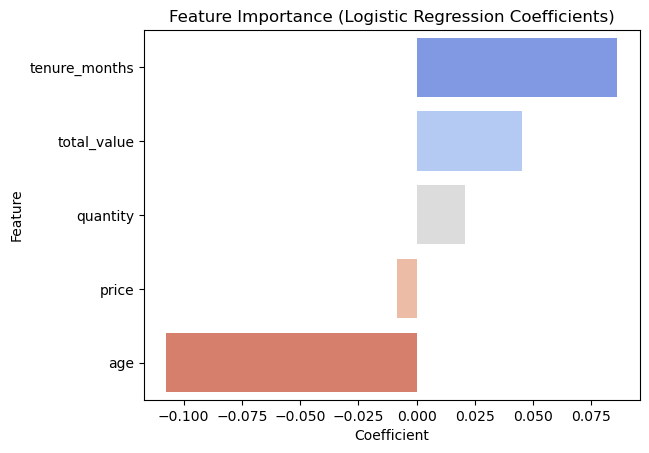

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# -------------------------
# Feature Selection
# -------------------------
features = ["price", "quantity", "total_value", "age", "tenure_months"]
X = df[features]
y = df["churn"]

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# Train Logistic Regression
# -------------------------
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:,1]

# -------------------------
# Model Evaluation
# -------------------------
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# -------------------------
# ROC Curve
# -------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# -------------------------
# Feature Importance (Coefficients)
# -------------------------
coeff_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

sns.barplot(x="Coefficient", y="Feature", data=coeff_df, palette="coolwarm")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

#Decision Tree

✅ Accuracy: 0.750625

Confusion Matrix:
 [[1182   21]
 [ 378   19]]

Classification Report:
               precision    recall  f1-score   support

           0      0.758     0.983     0.856      1203
           1      0.475     0.048     0.087       397

    accuracy                          0.751      1600
   macro avg      0.616     0.515     0.471      1600
weighted avg      0.688     0.751     0.665      1600

ROC-AUC Score: 0.6054929845830429


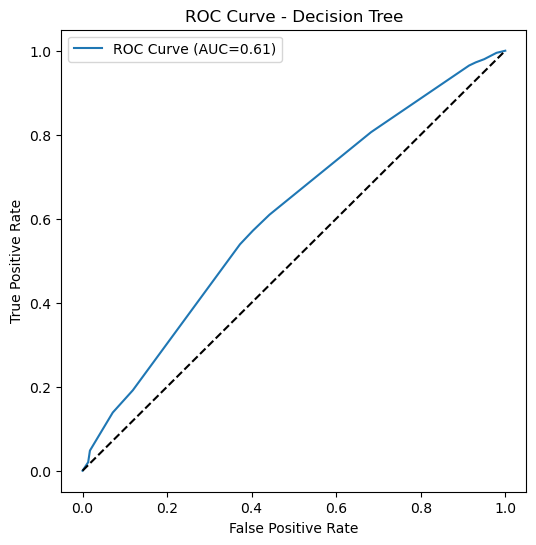

/var/folders/y2/5cx4xthx2k16l8p9r2r9t1j80000gn/T/ipykernel_23504/3745891164.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi, palette="viridis")


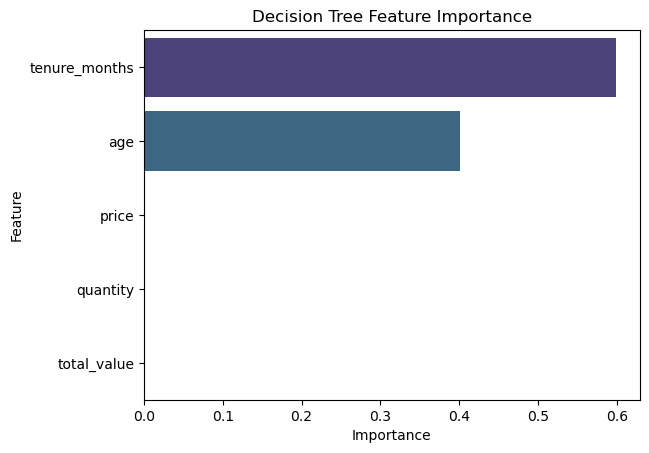

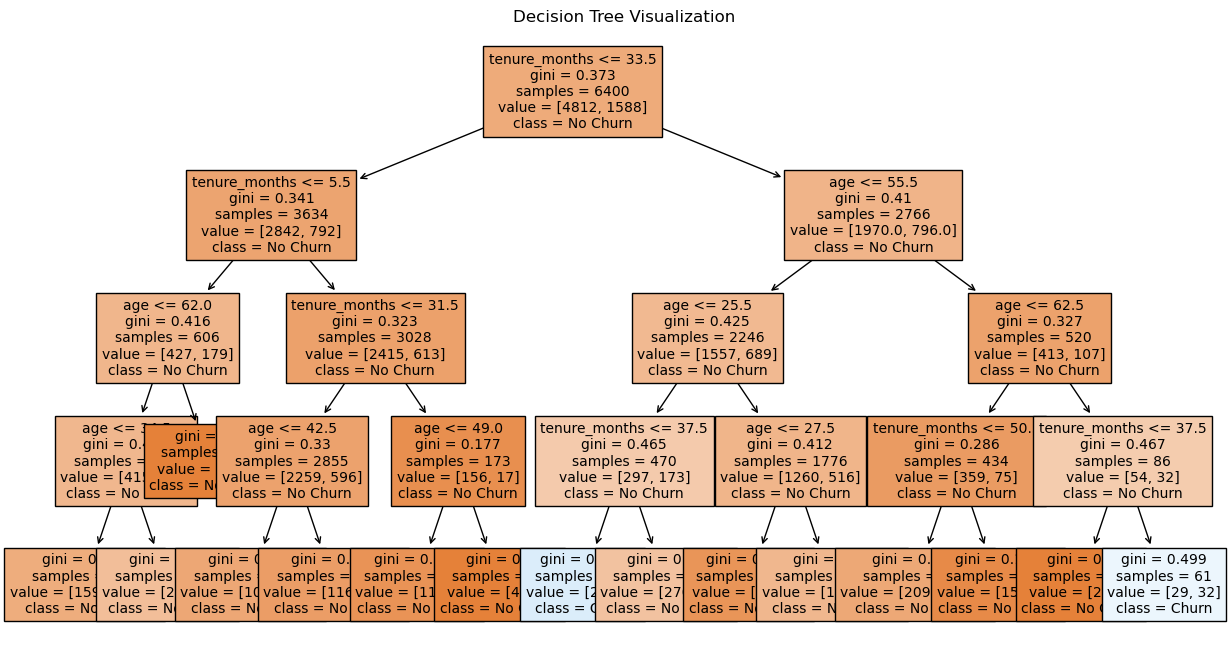

In [98]:
# =========================
# 📌 Step 20: Decision Tree for Churn Prediction
# =========================
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# -------------------------
# Features and Target
# -------------------------
features = ["price", "quantity", "total_value", "age", "tenure_months"]
X = df[features]
y = df["churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

# -------------------------
# Train Decision Tree
# -------------------------
dt = DecisionTreeClassifier(max_depth=4, random_state=42)  # limit depth to avoid overfitting
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:,1]

# -------------------------
# Evaluation
# -------------------------
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# -------------------------
# ROC Curve
# -------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

# -------------------------
# Feature Importance
# -------------------------
fi = pd.DataFrame({
    "Feature": features,
    "Importance": dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

sns.barplot(x="Importance", y="Feature", data=fi, palette="viridis")
plt.title("Decision Tree Feature Importance")
plt.show()

# -------------------------
# Visualize the Tree
# -------------------------
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=features, class_names=["No Churn","Churn"], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


#SVM for churn

✅ Accuracy: 0.751875

Confusion Matrix:
 [[1203    0]
 [ 397    0]]

Classification Report:
               precision    recall  f1-score   support

           0      0.752     1.000     0.858      1203
           1      0.000     0.000     0.000       397

    accuracy                          0.752      1600
   macro avg      0.376     0.500     0.429      1600
weighted avg      0.565     0.752     0.645      1600

ROC-AUC Score: 0.5044148654392566


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


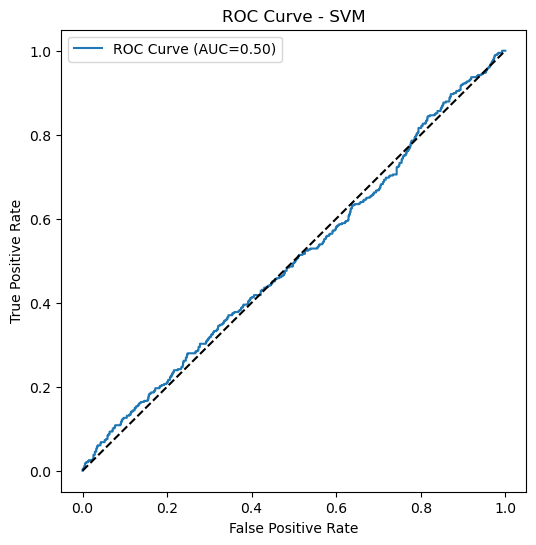

In [99]:
# =========================
# 📌 Step 21: SVM for Churn Prediction
# =========================
from sklearn.svm import SVC

# -------------------------
# Features and Target
# -------------------------
features = ["price", "quantity", "total_value", "age", "tenure_months"]
X = df[features]
y = df["churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

# Standardize features (SVM is sensitive to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# Train SVM (with probability outputs for ROC)
# -------------------------
svm_model = SVC(kernel="rbf", probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)
y_pred_proba = svm_model.predict_proba(X_test_scaled)[:,1]

# -------------------------
# Evaluation
# -------------------------
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# -------------------------
# ROC Curve
# -------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


✅ R² Score: -0.11165597928513726
RMSE: 1413379.4957268424


/var/folders/y2/5cx4xthx2k16l8p9r2r9t1j80000gn/T/ipykernel_23504/2990779483.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index("sale_date").resample("M")["total_value"].sum().reset_index()


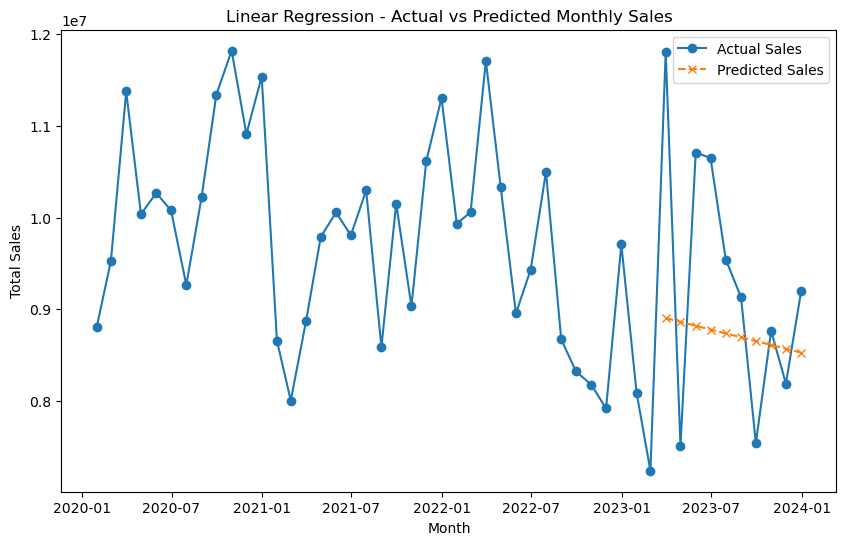

/var/folders/y2/5cx4xthx2k16l8p9r2r9t1j80000gn/T/ipykernel_23504/2990779483.py:61: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


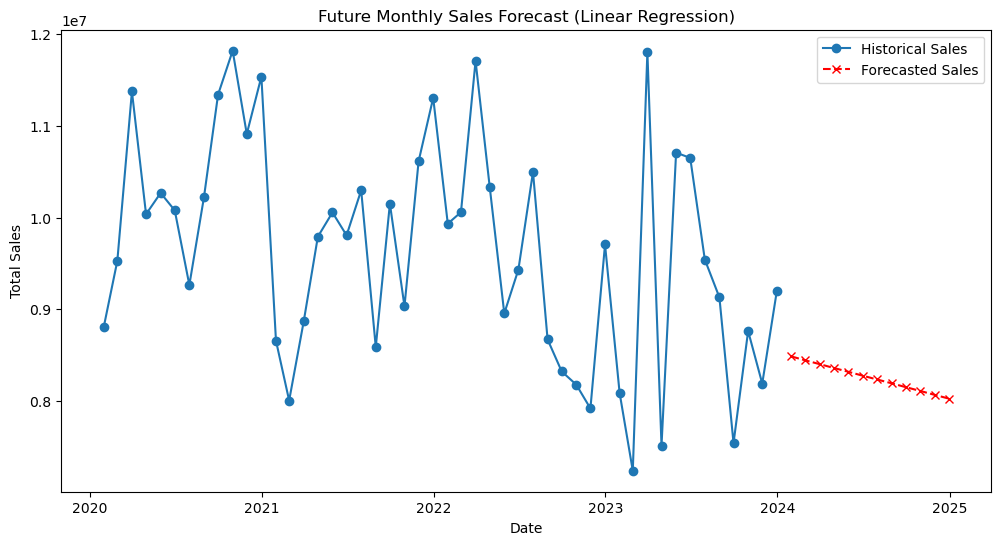

In [100]:
# =========================
# 📌 Linear Regression with Monthly Aggregation
# =========================
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# Prepare Monthly Time-Series Data
# -------------------------
df["sale_date"] = pd.to_datetime(df["sale_date"])
monthly_sales = df.set_index("sale_date").resample("M")["total_value"].sum().reset_index()

# Encode months as numeric
monthly_sales["months"] = (monthly_sales["sale_date"] - monthly_sales["sale_date"].min()).dt.days // 30

X = monthly_sales[["months"]]
y = monthly_sales["total_value"]

# Train-test split
split_index = int(len(monthly_sales) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# -------------------------
# Train Linear Regression
# -------------------------
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# -------------------------
# Model Evaluation
# -------------------------
print("✅ R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# -------------------------
# Visualization: Actual vs Predicted
# -------------------------
plt.figure(figsize=(10,6))
plt.plot(monthly_sales["sale_date"], y, label="Actual Sales", marker="o")
plt.plot(monthly_sales["sale_date"].iloc[split_index:], y_pred, label="Predicted Sales", marker="x", linestyle="--")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Linear Regression - Actual vs Predicted Monthly Sales")
plt.legend()
plt.show()

# -------------------------
# ✅ Future Forecast (Next N Months)
# -------------------------
N_MONTHS = 12  # forecast horizon

last_month = monthly_sales["months"].max()
future_months = np.arange(last_month + 1, last_month + 1 + N_MONTHS)
future_dates = pd.date_range(
    start=monthly_sales["sale_date"].max() + pd.offsets.MonthBegin(),
    periods=N_MONTHS,
    freq="M"
)

future_preds = lin_reg.predict(future_months.reshape(-1, 1))

# Plot with forecast
plt.figure(figsize=(12,6))
plt.plot(monthly_sales["sale_date"], y.values, label="Historical Sales", marker="o")
plt.plot(future_dates, future_preds, label="Forecasted Sales", linestyle="--", color="red", marker="x")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Future Monthly Sales Forecast (Linear Regression)")
plt.legend()
plt.show()


In [101]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['vader_compound'] = df['feedback_text'].astype(str).apply(lambda t: sia.polarity_scores(t)['compound'])
def map_vader(c):
    return 'Positive' if c>=0.05 else ('Negative' if c<=-0.05 else 'Neutral')
df['vader_label'] = df['vader_compound'].apply(map_vader)
pd.crosstab(df['sentiment'], df['vader_label'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/williambai/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


vader_label,Negative,Neutral,Positive
sentiment,,,
Negative,814,816,0
Neutral,834,0,1610
Positive,765,0,3161


VADER     Negative  Neutral  Positive
Actual                               
Negative       814      816         0
Neutral        834        0      1610
Positive       765        0      3161
Match rate: 0.496875
   topic  feedback_count  avg_total_value  churn_rate
0      0            2307     60001.083658    0.256177
1      1            2408     55165.573090    0.234219
2      2            3285     58189.482496    0.252664


,topic,term,weight
0,Topic 0,happy,1523.332647
1,Topic 0,use,784.332530
2,Topic 0,easy,784.332530
3,Topic 0,easy use,784.332530
4,Topic 0,reliable,784.332530
5,Topic 0,use reliable,784.332530
6,Topic 0,delivery,765.332530
7,Topic 0,delivery late,765.332530
8,Topic 0,late happy,765.332530
9,Topic 0,late,765.332530


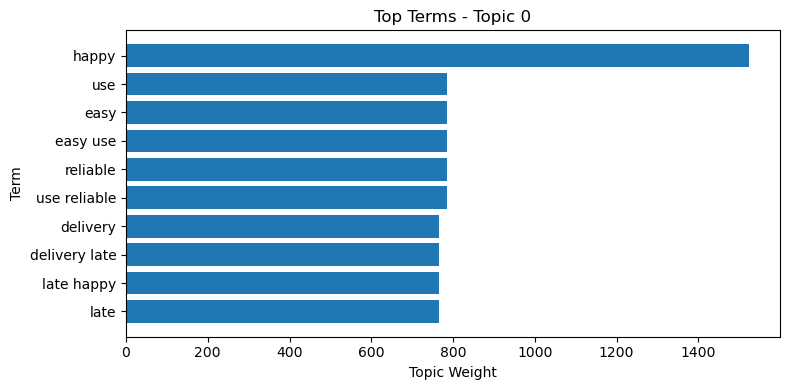

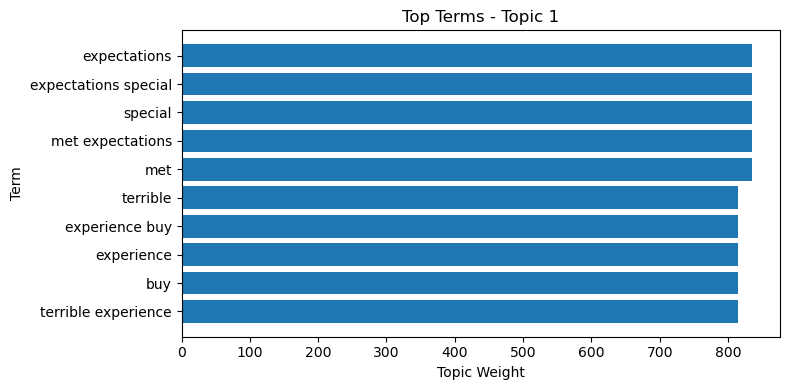

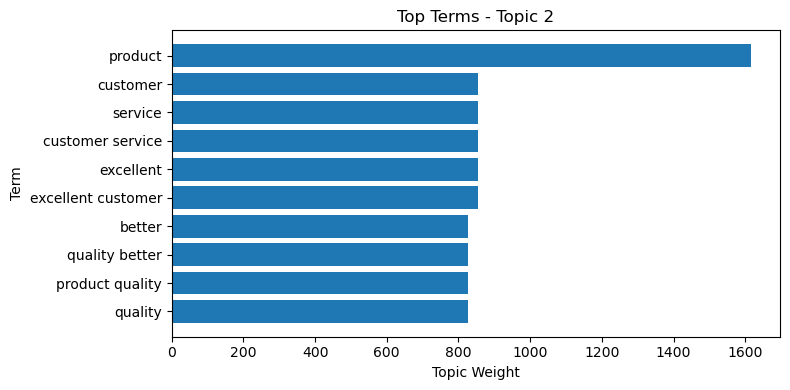

In [102]:
# --- Feedback Analysis: NLTK VADER Sentiment + LDA Topic Modeling ---

import pandas as pd, numpy as np, re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# If df already exists from earlier cells, skip the next 3 lines
# df = ...  # your existing DataFrame
# df.columns = df.columns.str.strip()
# (ensure `feedback_text`, `sentiment`, `churn`, `total_value` exist)

# ---------- VADER SENTIMENT (requires internet once to download) ----------
try:
    import nltk
    from nltk.sentiment import SentimentIntensityAnalyzer
    try:
        nltk.data.find("sentiment/vader_lexicon.zip")
    except LookupError:
        nltk.download("vader_lexicon")
    sia = SentimentIntensityAnalyzer()
    df['vader_compound'] = df['feedback_text'].astype(str).apply(lambda t: sia.polarity_scores(t)['compound'])
    def map_vader(c):
        return 'Positive' if c>=0.05 else ('Negative' if c<=-0.05 else 'Neutral')
    df['vader_label'] = df['vader_compound'].apply(map_vader)

    # Compare to provided labels
    print(pd.crosstab(df['sentiment'], df['vader_label'], rownames=['Actual'], colnames=['VADER']))
    print("Match rate:", (df['sentiment'] == df['vader_label']).mean())
except Exception as e:
    print("VADER sentiment not available in this environment:", e)

# ---------- LDA TOPIC MODELING ----------
def clean_text(s):
    s = str(s).lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

texts = df['feedback_text'].astype(str).apply(clean_text)

# unigrams + bigrams; remove very common words via stop_words='english'
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2), max_df=0.85)
X = vectorizer.fit_transform(texts)

n_topics = 3
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
W = lda.fit_transform(X)  # doc-topic
H = lda.components_       # topic-term
terms = np.array(vectorizer.get_feature_names_out())

def top_terms_for_topic(topic_idx, top_n=10):
    inds = H[topic_idx].argsort()[::-1][:top_n]
    return list(zip(terms[inds], H[topic_idx][inds]))

topic_top_terms = {f"Topic {i}": top_terms_for_topic(i, 10) for i in range(n_topics)}

# Assign dominant topic
df['topic'] = W.argmax(axis=1)

# Topic-level business summary
topic_summary = df.groupby('topic').agg(
    feedback_count=('feedback_text', 'count'),
    avg_total_value=('total_value', 'mean'),
    churn_rate=('churn', 'mean')
).reset_index()
print(topic_summary)

# Show top terms table
topic_rows = []
for t, pairs in topic_top_terms.items():
    for term, weight in pairs:
        topic_rows.append({"topic": t, "term": term, "weight": float(weight)})
topic_terms_df = pd.DataFrame(topic_rows)
display(topic_terms_df)

# --- Matplotlib bar charts for top terms per topic ---
import matplotlib.pyplot as plt
for i in range(n_topics):
    subset = topic_terms_df[topic_terms_df['topic'] == f"Topic {i}"].sort_values('weight', ascending=False).head(10)
    plt.figure(figsize=(8,4))
    plt.barh(list(subset['term'][::-1]), list(subset['weight'][::-1]))
    plt.title(f"Top Terms - Topic {i}")
    plt.xlabel("Topic Weight")
    plt.ylabel("Term")
    plt.tight_layout()
    plt.show()


In [103]:
df.head(20)

,sale_id,customer_id,product_id,product_name,category,price,quantity,sale_date,total_value,age,...,feedback_text,sentiment,churn_label,year,cluster,pca1,pca2,vader_compound,vader_label,topic
0,S000001,CUST01553,P004,Desk,Furniture,12000,2,2020-01-07,24000,40,...,"Terrible experience, will not buy again.",Negative,Churn,2020,0,-0.704818,1.460028,-0.4767,Negative,1
1,S000002,CUST00161,P010,Projector,Electronics,45000,2,2023-11-10,90000,50,...,Excellent customer service.,Positive,No Churn,2023,1,0.841112,-0.288509,0.5719,Positive,2
2,S000003,CUST00627,P010,Projector,Electronics,45000,4,2022-07-04,180000,33,...,Product quality could be better.,Neutral,No Churn,2022,1,2.101359,-0.222525,0.4404,Positive,2
3,S000004,CUST01291,P009,Monitor,Electronics,12000,1,2023-10-18,12000,41,...,"Delivery was late, not happy.",Positive,No Churn,2023,2,-1.089639,0.419708,-0.4585,Negative,0
4,S000005,CUST01456,P004,Desk,Furniture,12000,4,2023-09-13,48000,60,...,"Delivery was late, not happy.",Positive,No Churn,2023,2,-0.141706,-0.372183,-0.4585,Negative,0
5,S000006,CUST00634,P007,Pen Pack,Office Supplies,50,5,2022-10-22,250,51,...,Product quality could be better.,Neutral,No Churn,2022,2,-0.719816,-0.300842,0.4404,Positive,2
6,S000007,CUST01463,P005,Printer,Electronics,15000,1,2022-05-07,15000,57,...,Excellent customer service.,Positive,No Churn,2022,2,-0.977643,-0.081676,0.5719,Positive,2
7,S000008,CUST00235,P010,Projector,Electronics,45000,3,2020-04-19,135000,35,...,"Terrible experience, will not buy again.",Negative,Churn,2020,0,1.514915,1.581432,-0.4767,Negative,1
8,S000009,CUST01822,P010,Projector,Electronics,45000,5,2023-01-14,225000,24,...,Excellent customer service.,Positive,Churn,2023,1,2.717858,2.696886,0.5719,Positive,2
9,S000010,CUST01772,P002,Smartphone,Electronics,25000,2,2022-05-16,50000,53,...,"Delivery was late, not happy.",Positive,No Churn,2022,2,-0.083673,-1.414625,-0.4585,Negative,0


#Power Bi

In [104]:
df = pd.read_csv('customer_intelligence_dataset.csv')
df.head()

,sale_id,customer_id,product_id,product_name,category,price,quantity,sale_date,total_value,age,gender,region,segment,churn,tenure_months,last_purchase_date,feedback_text,sentiment
0,S000001,CUST01553,P004,Desk,Furniture,12000,2,2020-01-07,24000,40,Female,West,Small Business,1,37,2023-04-04,"Terrible experience, will not buy again.",Negative
1,S000002,CUST00161,P010,Projector,Electronics,45000,2,2023-11-10,90000,50,Female,West,Corporate,0,44,2023-03-02,Excellent customer service.,Positive
2,S000003,CUST00627,P010,Projector,Electronics,45000,4,2022-07-04,180000,33,Male,South,Corporate,0,25,2023-11-04,Product quality could be better.,Neutral
3,S000004,CUST01291,P009,Monitor,Electronics,12000,1,2023-10-18,12000,41,Male,West,Consumer,0,56,2023-08-18,"Delivery was late, not happy.",Positive
4,S000005,CUST01456,P004,Desk,Furniture,12000,4,2023-09-13,48000,60,Female,West,Consumer,0,52,2023-05-14,"Delivery was late, not happy.",Positive


In [105]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ============================
# 1. Load & Clean Data
# ============================

# Convert dates
df["sale_date"] = pd.to_datetime(df["sale_date"])
df["last_purchase_date"] = pd.to_datetime(df["last_purchase_date"])

# Verify total_value
df["calculated_total"] = df["price"] * df["quantity"]
df["total_value"] = np.where(df["total_value"] != df["calculated_total"],
                             df["calculated_total"], df["total_value"])

# Encode sentiment
sentiment_map = {"Negative": -1, "Neutral": 0, "Positive": 1}
df["sentiment_score"] = df["sentiment"].map(sentiment_map)

# Export cleaned sales
df.to_csv("cleaned_sales.csv", index=False)


# ============================
# 2. Feature Engineering (RFM)
# ============================
rfm = df.groupby("customer_id").agg({
    "last_purchase_date": lambda x: (df["sale_date"].max() - x.max()).days,  # Recency
    "sale_id": "count",     # Frequency
    "total_value": "sum",   # Monetary
    "sentiment_score": "mean",
    "tenure_months": "mean"
}).reset_index()

rfm.columns = ["customer_id", "Recency", "Frequency", "Monetary", "Avg_Sentiment", "Tenure"]

# ============================
# 3. Clustering (KMeans)
# ============================
features = rfm[["Recency", "Frequency", "Monetary", "Avg_Sentiment", "Tenure"]]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rfm["Cluster"] = kmeans.fit_predict(features)

rfm.to_csv("customer_clusters.csv", index=False)


# ============================
# 4. Churn Prediction
# ============================
X = df[["age", "tenure_months", "sentiment_score"]].copy()
y = df["churn"]

# Encode categorical variables
for col in ["gender", "region", "segment"]:
    df[col] = LabelEncoder().fit_transform(df[col])
    X[col] = df[col]


# Check if we have more than one churn class
if len(y.unique()) > 1:
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Logistic Regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predict churn probabilities
    df["churn_prob"] = model.predict_proba(X)[:, 1]
else:
    # Fallback: use churn column directly
    df["churn_prob"] = df["churn"]

# Export churn predictions
churn_output = df[["customer_id", "age", "tenure_months", "sentiment_score",
                   "gender", "region", "segment", "churn_prob"]].drop_duplicates()
churn_output.to_csv("churn_predictions.csv", index=False)

print("✅ Exported cleaned_sales.csv, customer_clusters.csv, churn_predictions.csv")


✅ Exported cleaned_sales.csv, customer_clusters.csv, churn_predictions.csv


In [106]:
cluster_profile = (
    rfm.groupby("Cluster")
       .agg(
           Customers=("customer_id", "count"),
           Avg_Recency=("Recency", "mean"),
           Avg_Frequency=("Frequency", "mean"),
           Avg_Monetary=("Monetary", "mean"),
           Avg_Tenure=("Tenure", "mean"),
           Avg_Sentiment=("Avg_Sentiment", "mean"),
       )
       .reset_index()
       .sort_values("Cluster")
)

# Nice for quick labeling:
print(cluster_profile)

   Cluster  Customers  Avg_Recency  Avg_Frequency   Avg_Monetary  Avg_Tenure  \
0        0        692   178.161850       4.641618  311229.407514   30.615607   
1        1        251   184.725100       6.023904  608606.175299   28.051793   
2        2       1024   188.907227       3.199219   92072.998047   29.791016   

   Avg_Sentiment  
0       0.284314  
1       0.272646  
2       0.302223  
